<a href="https://colab.research.google.com/github/ASCCJR/Challenge_Telecom_X_Parte_2/blob/main/_DESAFIO_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE 1**

# 🛠️  Extração de Dados
Esta seção é dedicada à extração e carregamento dos dados brutos em um DataFrame do Pandas.

In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
import json
import requests

# Define a URL RAW do arquivo JSON no GitHub
json_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

print(f"\nCarregando dados da URL: {json_url}")
try:
    # Faz a requisição HTTP para a URL
    response = requests.get(json_url)
    response.raise_for_status() # Lança um erro para status HTTP 4xx/5xx

    # Carrega o conteúdo JSON da resposta
    dados_json = json.loads(response.text)
    print("Arquivo JSON carregado via URL.")

    # Converte os dados JSON em um DataFrame do Pandas.
    dados_brutos = pd.DataFrame(dados_json)
    print("DataFrame inicial criado.")

    # Validação básica: verificar se as colunas esperadas estão presentes
    colunas_esperadas = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
    missing_columns = [col for col in colunas_esperadas if col not in dados_brutos.columns]

    if missing_columns:
        print(f"AVISO: As seguintes colunas esperadas não foram encontradas: {', '.join(missing_columns)}")
        print("Isso pode indicar um problema na estrutura do arquivo JSON na URL.")
    else:
        print("Todas as colunas esperadas foram encontradas.")

    # Exibe as primeiras linhas para verificar a estrutura dos dados.
    print("\nVisualizando as 5 primeiras linhas:")
    display(dados_brutos.head())

except requests.exceptions.RequestException as e:
    print(f"ERRO de requisição HTTP: {e}. Verifique a URL ou sua conexão com a internet.")
except json.JSONDecodeError:
    print(f"ERRO: O conteúdo da URL '{json_url}' está corrompido ou não é um JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")


Carregando dados da URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json
Arquivo JSON carregado via URL.
DataFrame inicial criado.
Todas as colunas esperadas foram encontradas.

Visualizando as 5 primeiras linhas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Comentario**

Ao olhar para o `head()` acima, a primeira coisa que notamos é que as colunas customer, phone, internet, e account não contêm valores simples como 'Yes' e 'No' ou '0' e '1'. Elas contêm dicionários (dados dentro de dados). Isso torna a análise direta impossível.

Nosso primeiro desafio é "desempacotar" ou "achatar" essas colunas. Uma ferramenta excelente para isso é o pandas.json_normalize.

# **Transformação de Dados**

Nesta etapa, os dados brutos são processados e transformados para um formato adequado para análise e modelagem. Isso inclui a normalização de estruturas aninhadas, tratamento de valores ausentes e conversão de tipos de dados.

In [ ]:
# Normalização de Estruturas Aninhadas
# Utiliza pd.json_normalize para  os dicionários aninhados das colunas 'customer', 'phone', 'internet' e 'account',
# transformando suas chaves em novas colunas no DataFrame principal.
dados_normalizados = pd.json_normalize(dados_json)
display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Remoção de Linhas com Valores Ausentes (NaN)
# Remove todas as linhas que contêm pelo menos um valor NaN após a normalização.
dados_normalizados.dropna(inplace=True)

**Comentario**

Agora, em vez de uma única coluna "`customer`", temos "`customer.gender`", "`customer.SeniorCitizen`", etc. A estrutura está muito mais clara e pronta para a próxima fase da nossa investigação.

Nosso próximo passo será usar o comando `.info()` para ter uma visão geral dos tipos de dados e da contagem de valores em cada uma dessas novas colunas. Isso geralmente revela inconsistências.

In [ ]:
# Diagnóstico do Tipo de Dados e Inconsistências
# O método .info() fornece um resumo do DataFrame, incluindo nomes de colunas,
# contagem de valores não-nulos e tipos de dados (Dtype).
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

- Muitas colunas são do tipo `object`: Colunas como Churn, `customer.gender`, `phone.PhoneService`, `account.Charges.Total`, etc., são todas classificadas como `object`. `object` geralmente significa que o Pandas está tratando a coluna como texto (string).

- Possíveis Problemas:
Para colunas como `Churn` ou` phone.PhoneService`, que contêm 'Yes' e 'No', object é esperado, mas precisaremos convertê-las para números (1 e 0) para fazer cálculos e análises.
Para colunas como `customer.tenure` (meses de contrato) e especialmente `account.Charges.Total` (gastos totais), o tipo object é um sinal de alerta. Esperávamos que fossem números (`int64` ou `float64`). O fato de não serem indica que provavelmente existem valores nessas colunas que não são números (como espaços em branco ou outros caracteres), o que está "contaminando" a coluna inteira.

In [ ]:
# Verificar valores únicos em cada coluna
print("--- Verificando valores únicos por coluna ---")
for coluna in dados_normalizados.columns:
    print(f"\nColuna: {coluna}")
    print(dados_normalizados[coluna].unique())

--- Verificando valores únicos por coluna ---

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: customer.gender
['Female' 'Male']

Coluna: customer.SeniorCitizen
[0 1]

Coluna: customer.Partner
['Yes' 'No']

Coluna: customer.Dependents
['Yes' 'No']

Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone.PhoneService
['Yes' 'No']

Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet.TechSupport
['Yes' 'No

# **Investigando a Coluna**
- `account.Charges.Total`

In [ ]:
# Vamos tentar converter a coluna 'account.Charges.Total' para float.
# Esperamos um erro, pois sabemos que o tipo é 'object'. O erro nos dará a pista.
try:
    dados_normalizados['account.Charges.Total'].astype(float)
except ValueError as e:
    print("--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---")
    print(f"A conversão falhou com a seguinte mensagem de erro:\n-> {e}")

--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---
A conversão falhou com a seguinte mensagem de erro:
-> could not convert string to float: ' '


Agora sabemos, com certeza, que o problema são strings que contêm apenas um espaço em branco (`' '`). Esses espaços não são números e, portanto, a coluna inteira foi classificada como `object`

- Faremos a conversão para numérico novamente, mas desta vez usaremos o parâmetro `errors='coerce'`.
- Isso dirá ao Pandas: "tente converter para número e, se você encontrar um valor que não pode ser convertido (como o `' '`), transforme-o em `NaN` (Not a Number), que é o marcador padrão do Pandas para dados ausentes."
- Depois da conversão, vamos verificar se os `NaNs` foram realmente criados.
- Finalmente, decidiremos o que fazer com as linhas que contêm esses dados ausentes.

In [ ]:
# Etapa: Conversão segura de account.Charges.Total com to_numeric(..., errors='coerce')
# Ação 1: Usar 'coerce' para transformar os valores inválidos em Nulos (NaN)
print("1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...")
dados_normalizados['account.Charges.Total'] = pd.to_numeric(dados_normalizados['account.Charges.Total'], errors='coerce')
print("   Conversão concluída. Valores problemáticos agora são 'NaN'.")

1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...
   Conversão concluída. Valores problemáticos agora são 'NaN'.


In [ ]:
# Etapa: Contagem e remoção dos NaN gerados em account.Charges.Total
# Verificação 1: Vamos confirmar quantos valores nulos foram criados.
# Esperamos que o número seja diferente de zero agora.
print("\n2. Investigando: Contando valores nulos na coluna...")
nulos_encontrados = dados_normalizados['account.Charges.Total'].isnull().sum()
print(f"   Descoberta: Encontrado(s) {nulos_encontrados} valor(es) nulo(s).")


2. Investigando: Contando valores nulos na coluna...
   Descoberta: Encontrado(s) 11 valor(es) nulo(s).


In [ ]:
# Ação: Como são poucos dados (comparado ao total), e não temos como saber o valor correto,
# a abordagem mais segura é remover as linhas com esses dados faltantes.
print("\n3. Ação: Removendo as linhas com valores nulos...")
dados_normalizados.dropna(subset=['account.Charges.Total'], inplace=True)
print("   Linhas removidas.")


3. Ação: Removendo as linhas com valores nulos...
   Linhas removidas.


In [ ]:
# Verificação: Vamos confirmar que a coluna agora está 100% limpa e com o tipo correto.
print("\n4. Verificação Final:")
print("   Contagem de nulos agora:", dados_normalizados['account.Charges.Total'].isnull().sum())
print("   Novo tipo de dado da coluna:", dados_normalizados['account.Charges.Total'].dtype)


4. Verificação Final:
   Contagem de nulos agora: 0
   Novo tipo de dado da coluna: float64


In [ ]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `Churn`

In [ ]:
# Etapa: Investigação e limpeza da coluna Churn (valores em branco)
# Vamos contar a frequência de cada valor único na coluna 'Churn'.
# Isso é fundamental para entender a nossa variável alvo.
print("--- Investigando a coluna 'Churn' ---")
print(dados_normalizados['Churn'].value_counts())

--- Investigando a coluna 'Churn' ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [ ]:
# Ação: Filtrar o DataFrame para remover os 224 registros onde 'Churn' é uma string vazia.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

# Ao adicionar .copy(), forçamos o Pandas a criar
# uma cópia explícita do DataFrame filtrado, garantindo que todas as operações subsequentes (como o inplace=True em dropna ou outras transformações)
# afetem apenas essa nova cópia, evitando assim os avisos e garantindo a consistência dos resultados.

Ação de Limpeza: 224 linhas foram removidas.


In [ ]:
# Verificação: Vamos conferir o resultado final da coluna 'Churn'
print("\n--- Verificação Pós-Transformação de 'Churn' ---")
print("Valores e contagens em 'Churn' após a limpeza:")
print(dados_normalizados['Churn'].value_counts())
print("\nTipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)


--- Verificação Pós-Transformação de 'Churn' ---
Valores e contagens em 'Churn' após a limpeza:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Tipo de dado da coluna 'Churn': object


In [ ]:
# Mapear 'Yes' para 1 e 'No' para 0 na coluna 'Churn'
print("Mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'...")
pd.set_option('future.no_silent_downcasting', True)
dados_normalizados['Churn'] = dados_normalizados['Churn'].replace({'Yes': 1, 'No': 0})
# Converter a coluna 'Churn' para tipo int
dados_normalizados['Churn'] = dados_normalizados['Churn'].astype(int)
print("Mapeamento e conversão para int concluídos.")

# Verificar o resultado
print("\nValores e contagens em 'Churn' após o mapeamento:")
print(dados_normalizados['Churn'].value_counts())
print("\nNovo tipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)

Mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'...
Mapeamento e conversão para int concluídos.

Valores e contagens em 'Churn' após o mapeamento:
Churn
0    5163
1    1869
Name: count, dtype: int64

Novo tipo de dado da coluna 'Churn': int64


In [ ]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `phone.MultipleLines`

In [ ]:
# Etapa 9: Investigação de colunas específicas
# Vamos investigar o conteúdo da coluna 'phone.MultipleLines' para ver quais são os valores possíveis.
print("--- Investigando a coluna 'phone.MultipleLines' ---")
print("Valores únicos e suas contagens:")
print(dados_normalizados['phone.MultipleLines'].value_counts())

--- Investigando a coluna 'phone.MultipleLines' ---
Valores únicos e suas contagens:
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Descobertas:

- Encontramos os valores 'Yes' e 'No', como esperado.
- Descobrimos um terceiro valor: 'No phone service'. Isso é crucial. Significa que não podemos simplesmente mapear 'Yes' para 1 e 'No' para 0, pois precisamos decidir o que fazer com essa terceira categoria.
- Nosso plano deve ser:
- Mapear 'Yes' para 1.
- Mapear tanto 'No' quanto 'No phone service' para 0.

In [ ]:
# Ação: Filtrar o DataFrame E criar uma cópia explícita para evitar avisos futuros.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

Ação de Limpeza: 0 linhas foram removidas.


In [ ]:
#Mapeamento da coluna phone.MultipleLines para valores numéricos

# Define o mapeamento específico para 'phone.MultipleLines'.
# 'Yes' vai para 1, 'No' e 'No phone service' vão para 0.
mapa_multiple_lines = {'Yes': 1, 'No': 0, 'No phone service': 0}

# Aplica o mapeamento à coluna.
dados_normalizados['phone.MultipleLines'] = dados_normalizados['phone.MultipleLines'].map(mapa_multiple_lines)

print("Mapeamento da coluna 'phone.MultipleLines' concluído.")

Mapeamento da coluna 'phone.MultipleLines' concluído.


In [ ]:
# Verificação: Vamos conferir se a transformação funcionou como o esperado.
print("\nValores e contagens após o mapeamento:")
print(dados_normalizados['phone.MultipleLines'].value_counts())
print("\nNovo tipo de dado da coluna:", dados_normalizados['phone.MultipleLines'].dtype)


Valores e contagens após o mapeamento:
phone.MultipleLines
0    4065
1    2967
Name: count, dtype: int64

Novo tipo de dado da coluna: int64


In [ ]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando as Colunas**
- `internet.OnlineSecurity`
- `internet.OnlineBackup`
- `internet.DeviceProtection`
- `internet.TechSupport`
- `internet.StreamingTV`
- `internet.StreamingMovies`



In [ ]:
# Investigação: Vamos ver os valores únicos da coluna de Segurança Online.
print("--- Investigando a coluna 'internet.OnlineSecurity' ---")
print(dados_normalizados['internet.OnlineSecurity'].value_counts())

--- Investigando a coluna 'internet.OnlineSecurity' ---
internet.OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Descoberta:
- O padrão se repete. Temos 'Yes', 'No', e a categoria 'No internet service'.
- Assim como antes, quem não tem internet não tem o serviço de segurança online, então podemos tratar 'No internet service' da mesma forma que 'No'.

In [ ]:
# Investigação: Vamos ver os valores únicos da coluna de Backup Online.
print("--- Investigando: internet.OnlineBackup ---")
print(dados_normalizados['internet.OnlineBackup'].value_counts())

--- Investigando: internet.OnlineBackup ---
internet.OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


In [ ]:
# Investigação: E a coluna de Proteção de Dispositivo?
print("\n--- Investigando: internet.DeviceProtection ---")
print(dados_normalizados['internet.DeviceProtection'].value_counts())


--- Investigando: internet.DeviceProtection ---
internet.DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


In [ ]:
# Investigação: E a coluna de Suporte Técnico?
print("\n--- Investigando: internet.TechSupport ---")
print(dados_normalizados['internet.TechSupport'].value_counts())


--- Investigando: internet.TechSupport ---
internet.TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


In [ ]:
# Investigação: E a coluna de StreamingTV?
print("\n--- Investigando: internet.StreamingTV ---")
print(dados_normalizados['internet.StreamingTV'].value_counts())


--- Investigando: internet.StreamingTV ---
internet.StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64


In [ ]:
# Investigação: E a coluna de StreamingMovies?
print("\n--- Investigando: internet.StreamingMovies ---")
print(dados_normalizados['internet.StreamingMovies'].value_counts())


--- Investigando: internet.StreamingMovies ---
internet.StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64


**Comentario**
- Agora que provamos que o padrão se repete, podemos criar uma única célula de ação para aplicar a transformação a todas essas colunas de serviço de uma vez, além das colunas binárias simples que também precisam ser tratadas.

In [ ]:
# Ação: Mapeamento de Colunas Binárias e de Serviço para Valores Numéricos (0 e 1)

# Define o mapeamento para as colunas de serviço (onde 'No internet service' se comporta como 'No').
colunas_de_servico = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
mapa_servico = {'Yes': 1, 'No': 0, 'No internet service': 0}

# Aplica o mapeamento a cada coluna de serviço.
for coluna in colunas_de_servico:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_servico)

# Define o mapeamento para colunas binárias simples ('Yes'/'No').
colunas_simples_sim_nao = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling'
]
mapa_simples = {'Yes': 1, 'No': 0}

# Aplica o mapeamento a cada coluna binária simples.
for coluna in colunas_simples_sim_nao:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_simples)

print("Mapeamento de colunas binárias e de serviço concluído.")

# Verificação: Exibe as primeiras linhas para confirmar as transformações.
print("\nVisualizando o DataFrame com as colunas transformadas:")
display(dados_normalizados.head())

# Re-verifica os tipos de dados após todas as transformações para garantir que estão corretos.
print("\n--- Resumo dos Tipos de Dados Pós-Mapeamento ---")
dados_normalizados.info()

Mapeamento de colunas binárias e de serviço concluído.

Visualizando o DataFrame com as colunas transformadas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40



--- Resumo dos Tipos de Dados Pós-Mapeamento ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  int

# **Investigando as Colunas**
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [ ]:
# Investigação: Vamos ver os valores da coluna de gênero.
print("--- Investigando: customer.gender ---")
print(dados_normalizados['customer.gender'].value_counts())

--- Investigando: customer.gender ---
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64


Descoberta: Ao executar, descobrimos que a coluna contém `Male `e `Female`. É uma coluna categórica com duas opções.

In [ ]:
# Investigação: E a coluna de serviço de internet?
print("\n--- Investigando: internet.InternetService ---")
print(dados_normalizados['internet.InternetService'].value_counts())


--- Investigando: internet.InternetService ---
internet.InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Descoberta: Descobrimos que existem três categorias: `Fiber optic`, `DSL`, e `No`.

In [ ]:
# Investigação: Por fim, a coluna de método de pagamento.
print("\n--- Investigando: account.PaymentMethod ---")
print(dados_normalizados['account.PaymentMethod'].value_counts())


--- Investigando: account.PaymentMethod ---
account.PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


Descoberta: Descobrimos quatro categorias: `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, e `Credit card (automatic)`.

In [ ]:
# Investigação: E a coluna de tipo de contrato?
print("\n--- Investigando: account.Contract ---")
print(dados_normalizados['account.Contract'].value_counts())


--- Investigando: account.Contract ---
account.Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)

- Para colunas com múltiplas categorias como essas, não podemos simplesmente mapeá-las para 0, 1, 2, etc., pois isso criaria uma falsa relação de ordem (por exemplo, "Two year" (2) seria considerado "maior" que "One year" (1)).

- A abordagem correta é o One-Hot Encoding. Ele transforma cada categoria em sua própria coluna com valores 0 ou 1. Por exemplo, a coluna account.Contract se transformará em três novas colunas: account.Contract_Month-to-month, account.Contract_One year, e account.Contract_Two year. Se um cliente tiver um contrato mensal, ele terá o valor 1 na primeira coluna e 0 nas outras duas.

- A função pd.get_dummies() faz isso perfeitamente para nós.

# **Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)** 🛠️
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [ ]:
# Ação 1: Aplicar One-Hot Encoding para Variáveis Categóricas Nominais

print("1. Aplicando One-Hot Encoding às colunas categóricas selecionadas...")
colunas_categoricas_ohe = [ # Lista de colunas a serem transformadas via One-Hot Encoding.
    'customer.gender',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

1. Aplicando One-Hot Encoding às colunas categóricas selecionadas...


In [ ]:
# pd.get_dummies cria novas colunas binárias para cada categoria.
# 'drop_first=False' mantém todas as categorias, o que é útil para análise descritiva inicial.
df_transformado = pd.get_dummies(
    dados_normalizados,
    columns=colunas_categoricas_ohe,
    drop_first=False
)
print("   One-Hot Encoding concluído.")

   One-Hot Encoding concluído.


In [ ]:
dados_normalizados.info()

# Verificar os valores únicos das colunas criadas pelo get_dummies
print("\n--- Verificando valores das colunas criadas por get_dummies ---")
colunas_dummies = [
    'customer.gender_Female', 'customer.gender_Male',
    'internet.InternetService_DSL', 'internet.InternetService_Fiber optic', 'internet.InternetService_No',
    'account.Contract_Month-to-month', 'account.Contract_One year', 'account.Contract_Two year',
    'account.PaymentMethod_Bank transfer (automatic)', 'account.PaymentMethod_Credit card (automatic)',
    'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check'
]

for coluna in colunas_dummies:
    if coluna in df_transformado.columns:
        print(f"\nColona: {coluna}")
        print(df_transformado[coluna].value_counts())
    else:
        print(f"\nColona: {coluna} não encontrada no DataFrame transformado.")

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  internet.TechSupport       7032 non-null   int64  
 1

Comentario: A verificação com .value_counts() confirma que as colunas criadas pelo get_dummies contêm apenas valores True e False, como esperado. Aparentemente não temos "falsos non-nulls" nessas colunas.

In [ ]:
# Converter colunas booleanas (True/False) para inteiros (1/0)
print("Convertendo colunas booleanas para inteiros (1/0)...")

# Seleciona apenas as colunas que são do tipo booleano (True/False)
colunas_booleanas = df_transformado.select_dtypes(include='bool').columns

# Converte as colunas booleanas selecionadas para tipo int
df_transformado[colunas_booleanas] = df_transformado[colunas_booleanas].astype(int)

print("Conversão concluída.")

# Verificação: Mostra os tipos de dados para confirmar a conversão
print("\n--- Tipos de Dados Após a Conversão de Boolean para Int ---")
df_transformado.info()

Convertendo colunas booleanas para inteiros (1/0)...
Conversão concluída.

--- Tipos de Dados Após a Conversão de Boolean para Int ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7032 non-null   object 
 1   Churn                                            7032 non-null   int64  
 2   customer.SeniorCitizen                           7032 non-null   int64  
 3   customer.Partner                                 7032 non-null   int64  
 4   customer.Dependents                              7032 non-null   int64  
 5   customer.tenure                                  7032 non-null   int64  
 6   phone.PhoneService                               7032 non-null   int64  
 7   phone.MultipleLines                              7032 no

In [ ]:
# Identificar e analisar colunas numéricas que não são binárias esperadas

print("--- Analisando colunas numéricas (não binárias esperadas) ---")

# Lista de colunas que *deveriam* ser binárias (para exclusão)
colunas_binarias_int = [
    'Churn',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling',
    'customer.gender_Female',
    'customer.gender_Male',
    'internet.InternetService_DSL',
    'internet.InternetService_Fiber optic',
    'internet.InternetService_No',
    'account.Contract_Month-to-month',
    'account.Contract_One year',
    'account.Contract_Two year',
    'account.PaymentMethod_Bank transfer (automatic)',
    'account.PaymentMethod_Credit card (automatic)',
    'account.PaymentMethod_Electronic check',
    'account.PaymentMethod_Mailed check'
]

# Selecionar todas as colunas numéricas (int64 e float64)
colunas_numericas = df_transformado.select_dtypes(include=['int64', 'float64']).columns

# Filtrar as colunas numéricas para excluir as que são esperadas como binárias
colunas_para_analisar = [col for col in colunas_numericas if col not in colunas_binarias_int]

if colunas_para_analisar:
    print("\nColunas numéricas para análise:")
    for coluna in colunas_para_analisar:
        print(f"- {coluna}")

    # Exibir estatísticas descritivas para essas colunas
    print("\n--- Estatísticas Descritivas ---")
    display(df_transformado[colunas_para_analisar].describe())

else:
    print("\nNão foram encontradas colunas numéricas para analisar além das esperadas como binárias.")

--- Analisando colunas numéricas (não binárias esperadas) ---

Colunas numéricas para análise:
- customer.tenure
- account.Charges.Monthly
- account.Charges.Total

--- Estatísticas Descritivas ---


,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# **Refinamento**

In [ ]:
# Definir 'customerID' como o índice do DataFrame

# Define a coluna 'customerID' como o índice do DataFrame.
# Isso é uma boa prática para identificação única de registros e evita que 'customerID' seja tratada como uma feature para modelos.
print("\n2. Definindo 'customerID' como o índice do DataFrame...")
if 'customerID' in df_transformado.columns:
    df_transformado.set_index('customerID', inplace=True)
print("   'customerID' definido como índice.")

# Verificar o DataFrame após definir o índice
print("\n--- DataFrame após definir 'customerID' como índice ---")
display(df_transformado.head())
print("\n--- Tipos de Dados Após definir o índice ---")
df_transformado.info()


2. Definindo 'customerID' como o índice do DataFrame...
   'customerID' definido como índice.

--- DataFrame após definir 'customerID' como índice ---


,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
0003-MKNFE,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
0011-IGKFF,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
0013-EXCHZ,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1



--- Tipos de Dados Após definir o índice ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   int64  
 1   customer.SeniorCitizen                           7032 non-null   int64  
 2   customer.Partner                                 7032 non-null   int64  
 3   customer.Dependents                              7032 non-null   int64  
 4   customer.tenure                                  7032 non-null   int64  
 5   phone.PhoneService                               7032 non-null   int64  
 6   phone.MultipleLines                              7032 non-null   int64  
 7   internet.OnlineSecurity                          7032 non-null   int64  
 8   internet.OnlineBackup                            703

# Salvando Nova Base de Dado

In [ ]:
# Salvar o DataFrame transformado em um arquivo CSV
# index=True para incluir o customerID como coluna no CSV
df_transformado.to_csv('telecom_data_transformed.csv', index=True)

print("DataFrame transformado salvo como 'telecom_data_transformed.csv'")

DataFrame transformado salvo como 'telecom_data_transformed.csv'


# **PARTE 2**

In [ ]:
# Carregar a base de dados transformada
df_final = pd.read_csv('telecom_data_transformed.csv')

# Exibir as primeiras linhas do DataFrame final
print("DataFrame final carregado:")
display(df_final.head())

DataFrame final carregado:


,customerID,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


# **Remoção de Colunas Irrelevantes**

In [ ]:
# Exibir informações sobre o DataFrame final (nomes das colunas e tipos de dados)
print("Informações sobre o DataFrame final:")
df_final.info()

Informações sobre o DataFrame final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7032 non-null   object 
 1   Churn                                            7032 non-null   int64  
 2   customer.SeniorCitizen                           7032 non-null   int64  
 3   customer.Partner                                 7032 non-null   int64  
 4   customer.Dependents                              7032 non-null   int64  
 5   customer.tenure                                  7032 non-null   int64  
 6   phone.PhoneService                               7032 non-null   int64  
 7   phone.MultipleLines                              7032 non-null   int64  
 8   internet.OnlineSecurity                          7032 non-null   int64 

In [ ]:
# Remover colunas não relevantes
# A coluna 'customerID' é um identificador e não deve ser usada como feature para o modelo.
print("Removendo colunas não relevantes...")
colunas_para_remover = ['customerID']
df_final = df_final.drop(columns=colunas_para_remover)
print(f"Coluna(s) {colunas_para_remover} removida(s).")

# Verificar o DataFrame após a remoção
print("\n--- DataFrame após remoção de colunas ---")
display(df_final.head())
print("\n--- Tipos de Dados Após remoção de colunas ---")
df_final.info()

Removendo colunas não relevantes...
Coluna(s) ['customerID'] removida(s).

--- DataFrame após remoção de colunas ---


,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1



--- Tipos de Dados Após remoção de colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   int64  
 1   customer.SeniorCitizen                           7032 non-null   int64  
 2   customer.Partner                                 7032 non-null   int64  
 3   customer.Dependents                              7032 non-null   int64  
 4   customer.tenure                                  7032 non-null   int64  
 5   phone.PhoneService                               7032 non-null   int64  
 6   phone.MultipleLines                              7032 non-null   int64  
 7   internet.OnlineSecurity                          7032 non-null   int64  
 8   internet.OnlineBackup                            7032 non-nu

# **Verificação da Proporção de Evasão** (Verificar necessidade de balanceamento)

- A análise confirmou que há um desequilíbrio significativo nas classes de churn, com a classe minoritária (Churn = 1) representando cerca de 26.58% dos dados. Isso é uma informação importante que precisaremos considerar durante a modelagem, possivelmente utilizando técnicas de balanceamento de classes.
- **PORÉM**, a aplicação de técnicas de balanceamento de classes (como oversampling ou undersampling) geralmente é **feita após a divisão dos dado**s em conjuntos de treinamento e teste. O balanceamento deve ser aplicado apenas no conjunto de treinamento.

In [ ]:
# Calcular a contagem de cada classe na coluna 'Churn'
print("Contagem de clientes por classe de Churn:")
churn_counts = df_final['Churn'].value_counts()
display(churn_counts)

# Calcular a proporção de cada classe
print("\nProporção de clientes por classe de Churn:")
churn_proportions = df_final['Churn'].value_counts(normalize=True)
display(churn_proportions)

# Comentário sobre o desequilíbrio (se houver)
if churn_proportions.min() < 0.3: # Exemplo de limite para considerar desbalanceado
    print("\nObservação: Há um desequilíbrio significativo entre as classes de Churn.")
    print("A classe minoritária representa aproximadamente {:.2f}% do total.".format(churn_proportions.min() * 100))
    print("Isso pode exigir técnicas de tratamento de desbalanceamento durante a modelagem.")
else:
    print("\nObservação: As classes de Churn parecem razoavelmente balanceadas.")

Contagem de clientes por classe de Churn:


,count
Churn,
0,5163
1,1869



Proporção de clientes por classe de Churn:


,proportion
Churn,
0,0.734215
1,0.265785



Observação: Há um desequilíbrio significativo entre as classes de Churn.
A classe minoritária representa aproximadamente 26.58% do total.
Isso pode exigir técnicas de tratamento de desbalanceamento durante a modelagem.


# **🎯 Correlação e Seleção de Variáveis**

Nesta seção, visualizamos a matriz de correlação para entender as relações entre as variáveis numéricas e identificar aquelas com maior impacto na evasão (Churn).

--- Calculando a Matriz de Correlação ---
Cálculo concluído.

--- Correlação com a variável 'Churn' ---
Churn                                              1.000000
account.Contract_Month-to-month                    0.404565
internet.InternetService_Fiber optic               0.307463
account.PaymentMethod_Electronic check             0.301455
account.Charges.Monthly                            0.192858
account.PaperlessBilling                           0.191454
customer.SeniorCitizen                             0.150541
internet.StreamingTV                               0.063254
internet.StreamingMovies                           0.060860
phone.MultipleLines                                0.040033
phone.PhoneService                                 0.011691
customer.gender_Female                             0.008545
customer.gender_Male                              -0.008545
internet.DeviceProtection                         -0.066193
internet.OnlineBackup                             -0.082

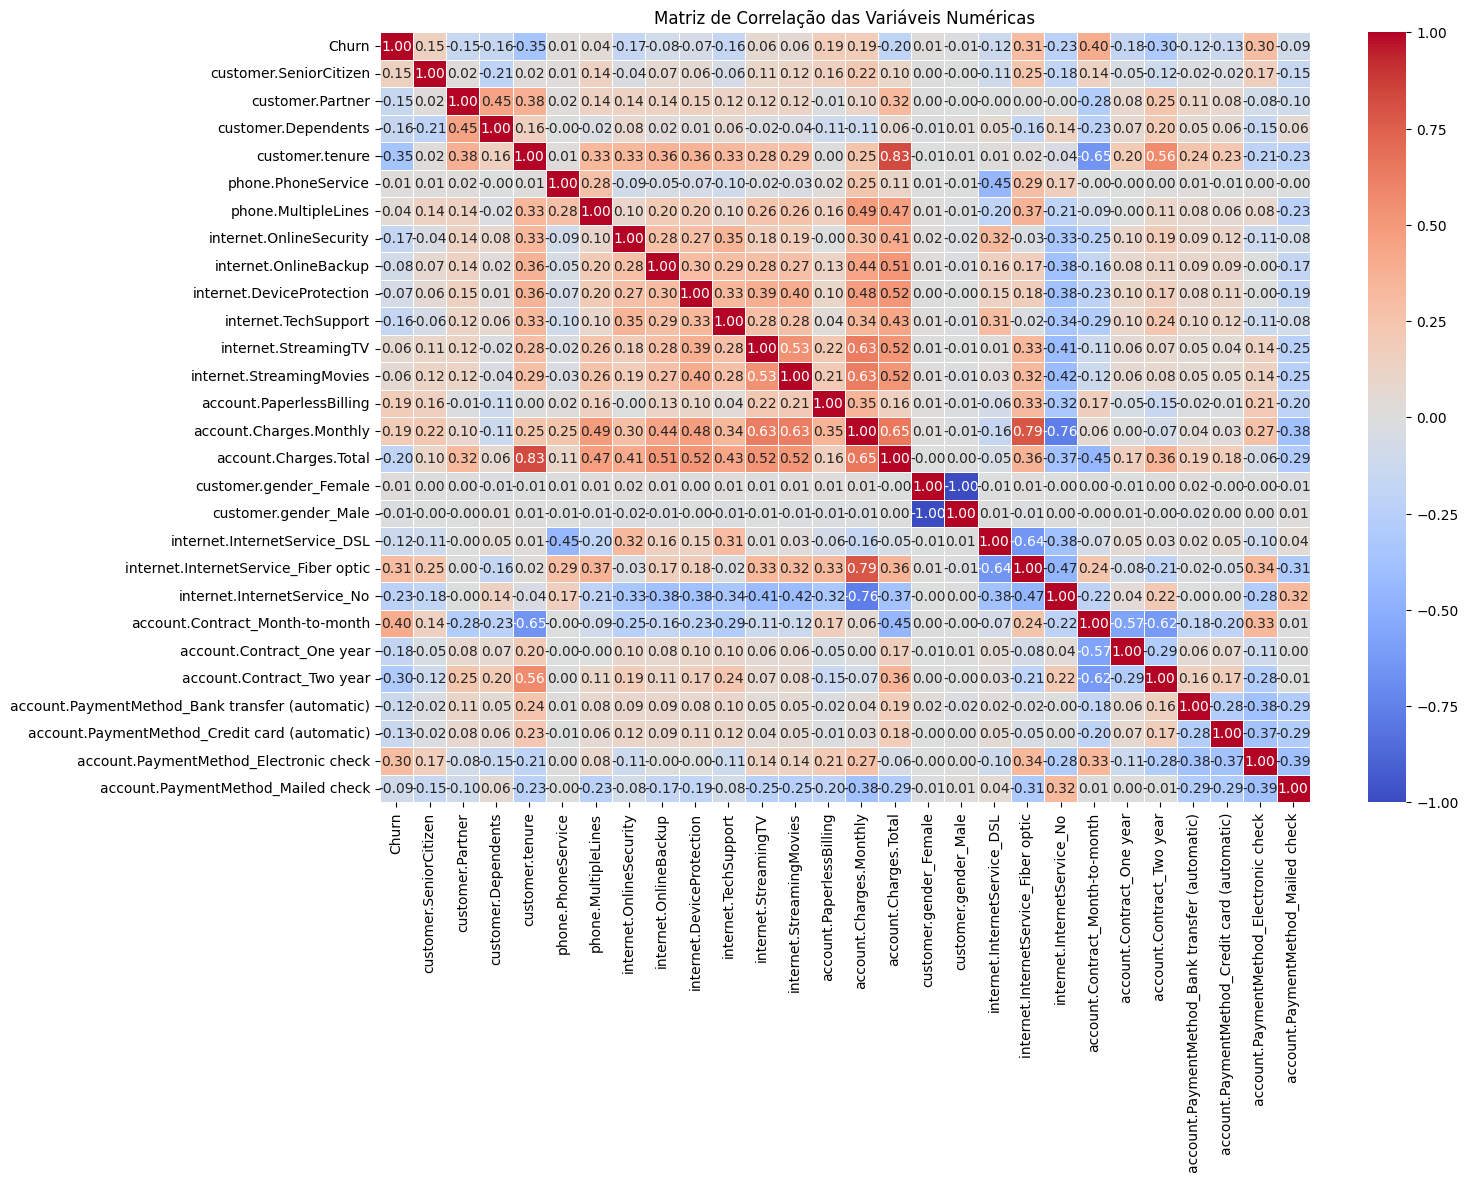

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
# O método .corr() calcula a correlação de Pearson por padrão.
print("--- Calculando a Matriz de Correlação ---")
matriz_correlacao = df_final.corr(numeric_only=True)
print("Cálculo concluído.")

# Exibir a matriz de correlação focada na variável alvo 'Churn'
print("\n--- Correlação com a variável 'Churn' ---")
print(matriz_correlacao['Churn'].sort_values(ascending=False))

# Visualizar a matriz de correlação completa usando um heatmap
print("\n--- Visualizando a Matriz de Correlação Completa ---")
plt.figure(figsize=(15, 10)) # Define o tamanho da figura para melhor visualização
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

A análise de correlação nos deu informações sobre as relações entre as variáveis e a evasão. Agora que temos essa compreensão, o próximo passo essencial é preparar os dados para a modelagem:

Separar Features e Variável Alvo: Definir quais colunas serão usadas como features (X) e qual coluna é a variável alvo (y - Churn). Dividir em Conjuntos de Treino e Teste: Separar os dados em conjuntos para treinamento e teste, garantindo que o modelo seja avaliado em dados que ele não viu durante o treinamento.

# **📊 Análise de Correlação**

# **📈 Análises Direcionadas: Tempo de Contrato e Total Gasto vs. Evasão**

Nesta seção, investigamos a relação entre variáveis específicas (`customer.tenure` e `account.Charges.Total`) e a variável alvo (`Churn`) utilizando visualizações.

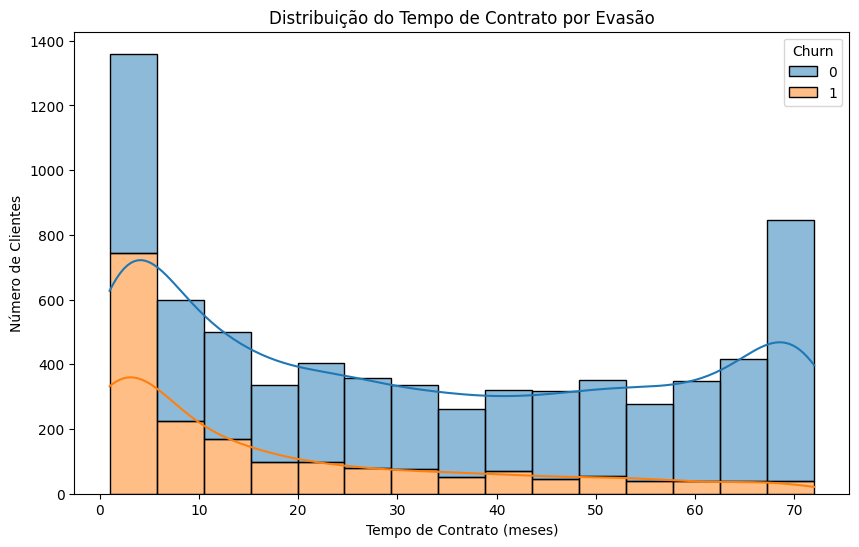

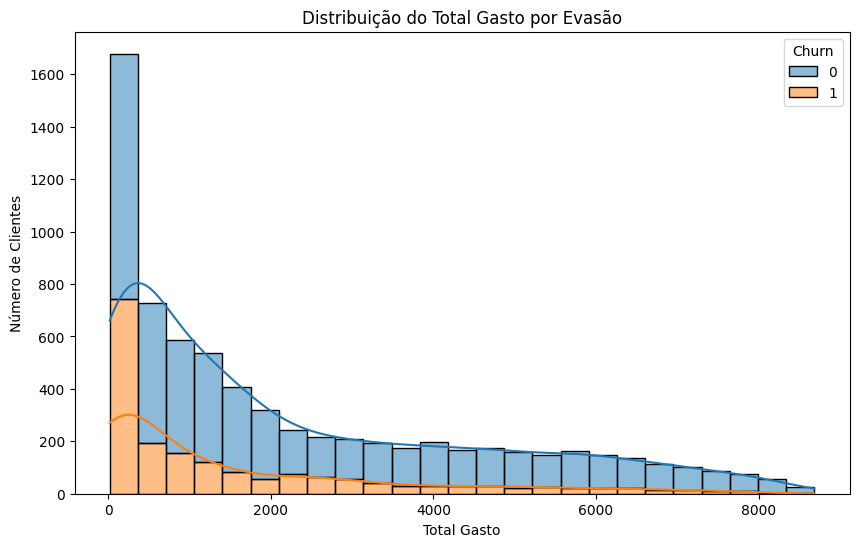

In [ ]:
# Análise Direcionada: Tempo de Contrato vs. Evasão

# Visualizar a distribuição do tempo de contrato para clientes que evadiram e que não evadiram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='customer.tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Número de Clientes')
plt.show()

# Análise Direcionada: Total Gasto vs. Evasão

# Visualizar a distribuição do total gasto para clientes que evadiram e que não evadiram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='account.Charges.Total', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição do Total Gasto por Evasão')
plt.xlabel('Total Gasto')
plt.ylabel('Número de Clientes')
plt.show()

# **📈 Verificação de Multicolinearidade (VIF)**

Nesta seção, calculamos o Fator de Inflação da Variância (VIF) para identificar e quantificar a multicolinearidade entre as variáveis preditoras.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm # Importando statsmodels com o alias sm

# Separar as features (X) da variável alvo (y)
# Excluímos a coluna 'Churn' que é a variável alvo.
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Selecionar apenas as colunas numéricas para o cálculo do VIF
# O VIF só é calculado para variáveis numéricas.
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Adicionar uma constante ao DataFrame para o cálculo do VIF (necessário para o statsmodels)
X_numeric = sm.add_constant(X_numeric)

# Calcular o VIF para cada variável
# Criamos um DataFrame para armazenar os resultados
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns

# Calcula o VIF para cada feature
# variance_inflation_factor(dados, indice_da_feature)
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i)
                   for i in range(X_numeric.shape[1])]

# Exibir os resultados ordenados por VIF
print("--- Cálculo do VIF (Variance Inflation Factor) ---")
print(vif_data.sort_values(by="VIF", ascending=False))

# Interpretação comum dos valores de VIF:
# VIF = 1: Não há multicolinearidade.
# 1 < VIF < 5: Multicolinearidade moderada.
# VIF >= 5 ou 10: Multicolinearidade alta, pode ser problemático.

print("\n--- Interpretação do VIF ---")
print("- VIF = 1: Não há multicolinearidade.")
print("- 1 < VIF < 5: Multicolinearidade moderada.")
print("- VIF >= 5 ou 10: Multicolinearidade alta, pode ser problemático.")

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


--- Cálculo do VIF (Variance Inflation Factor) ---
                                            feature         VIF
27               account.PaymentMethod_Mailed check         inf
26           account.PaymentMethod_Electronic check         inf
25    account.PaymentMethod_Credit card (automatic)         inf
24  account.PaymentMethod_Bank transfer (automatic)         inf
20                      internet.InternetService_No         inf
21                  account.Contract_Month-to-month         inf
22                        account.Contract_One year         inf
23                        account.Contract_Two year         inf
16                           customer.gender_Female         inf
17                             customer.gender_Male         inf
18                     internet.InternetService_DSL         inf
19             internet.InternetService_Fiber optic         inf
14                          account.Charges.Monthly  866.089640
5                                phone.PhoneService  

# 📈 **Lidando com Multicolinearidade**

Removendo colunas redundantes criadas pelo One-Hot Encoding para mitigar a multicolinearidade.

In [ ]:
# Identificar as colunas a serem removidas para evitar multicolinearidade perfeita
# Removemos uma coluna de cada grupo de variáveis categóricas originais.
colunas_para_remover_multicolinearidade = [
    'customer.gender_Female', # Remove uma das colunas de gênero
    'internet.InternetService_No', # Remove uma das colunas de serviço de internet
    'account.Contract_Two year', # Remove uma das colunas de contrato
    'account.PaymentMethod_Mailed check' # Remove uma das colunas de método de pagamento
]

# Criar um novo DataFrame excluindo as colunas identificadas
df_sem_multicolinearidade = df_transformado.drop(columns=colunas_para_remover_multicolinearidade)

print("Colunas removidas para mitigar multicolinearidade:")
print(colunas_para_remover_multicolinearidade)
print("\nNovo DataFrame criado sem as colunas removidas.")

# Exibir informações sobre o novo DataFrame
print("\n--- Informações sobre o DataFrame sem Multicolinearidade ---")
df_sem_multicolinearidade.info()

Colunas removidas para mitigar multicolinearidade:
['customer.gender_Female', 'internet.InternetService_No', 'account.Contract_Two year', 'account.PaymentMethod_Mailed check']

Novo DataFrame criado sem as colunas removidas.

--- Informações sobre o DataFrame sem Multicolinearidade ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   int64  
 1   customer.SeniorCitizen                           7032 non-null   int64  
 2   customer.Partner                                 7032 non-null   int64  
 3   customer.Dependents                              7032 non-null   int64  
 4   customer.tenure                                  7032 non-null   int64  
 5   phone.PhoneService                           

# **📈 Verificação de Multicolinearidade (VIF) - Pós Remoção**

Recalculando o VIF após a remoção de colunas para verificar a redução da multicolinearidade.

In [ ]:
# Recalcular o VIF para o DataFrame sem as colunas redundantes

# Separar as features (X) da variável alvo (y) do novo DataFrame
# Excluímos a coluna 'Churn' que é a variável alvo.
X_sem_multi = df_sem_multicolinearidade.drop('Churn', axis=1)
y_sem_multi = df_sem_multicolinearidade['Churn']

# Selecionar apenas as colunas numéricas para o cálculo do VIF
X_sem_multi_numeric = X_sem_multi.select_dtypes(include=['int64', 'float64'])

# Adicionar uma constante ao DataFrame para o cálculo do VIF (necessário para o statsmodels)
X_sem_multi_numeric = sm.add_constant(X_sem_multi_numeric)

# Calcular o VIF para cada variável no novo DataFrame
vif_data_sem_multi = pd.DataFrame()
vif_data_sem_multi["feature"] = X_sem_multi_numeric.columns

# Calcula o VIF para cada feature
vif_data_sem_multi["VIF"] = [variance_inflation_factor(X_sem_multi_numeric.values, i)
                             for i in range(X_sem_multi_numeric.shape[1])]

# Exibir os resultados ordenados por VIF
print("--- Cálculo do VIF (Variance Inflation Factor) - Pós Remoção ---")
print(vif_data_sem_multi.sort_values(by="VIF", ascending=False))

# Interpretação comum dos valores de VIF:
print("\n--- Interpretação do VIF ---")
print("- VIF = 1: Não há multicolinearidade.")
print("- 1 < VIF < 5: Multicolinearidade moderada.")
print("- VIF >= 5 ou 10: Multicolinearidade alta, pode ser problemático.")

--- Cálculo do VIF (Variance Inflation Factor) - Pós Remoção ---
                                            feature         VIF
14                          account.Charges.Monthly  866.089640
18             internet.InternetService_Fiber optic  592.296922
17                     internet.InternetService_DSL  138.718618
0                                             const   42.090344
5                                phone.PhoneService   34.893857
12                         internet.StreamingMovies   24.156394
11                             internet.StreamingTV   24.080019
15                            account.Charges.Total   10.811490
4                                   customer.tenure    7.584453
6                               phone.MultipleLines    7.289761
9                         internet.DeviceProtection    6.924754
8                             internet.OnlineBackup    6.796678
10                             internet.TechSupport    6.476508
7                           internet.On

# **`df_final_normalizado` e `df_final_nao_normalizado`**

- **Modelos baseados em distância** (como `KNN`, `SVM`,`K-Means para clustering`, e geralmente a `Regressão Logística` e `Redes Neurais`, embora a sensibilidade possa variar) são muito influenciados pela escala das características. Se uma característica tem valores muito maiores do que outra, ela pode dominar a cálculo das distâncias, afetando negativamente o desempenho do modelo. Nesses casos, a normalização ou padronização é crucial.

- **Modelos baseados em árvores** (como `Decision Trees`, `Random Forests`, `Gradient Boosting Machines`, `XGBoost`, `LightGBM`) funcionam dividindo os dados com base em limiares de características. A escala da característica não afeta a escolha do limiar (por exemplo, dividir em `idade <= 30` vs `idade > 30` é o mesmo, independentemente de a idade estar em anos ou meses). Portanto, para esses modelos, a normalização ou padronização geralmente não é necessária e não melhora (nem piora significativamente) o desempenho.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Manter o DataFrame final atual como a versão não normalizada
df_final_nao_normalizado = df_final.copy()
print("DataFrame 'df_final_nao_normalizado' criado (versão não normalizada).")


# Criar a versão normalizada do DataFrame

# Identificar as colunas numéricas a serem normalizadas
# Excluímos a variável alvo 'Churn' da normalização.
colunas_numericas_para_normalizar = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_numericas_para_normalizar.remove('Churn')
print(f"\nColunas numéricas para normalizar: {colunas_numericas_para_normalizar}")

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler às colunas numéricas
# O StandardScaler retorna um numpy array, precisamos convertê-lo de volta para DataFrame
df_final_normalizado_numeric = scaler.fit_transform(df_final[colunas_numericas_para_normalizar])

# Criar um novo DataFrame para os dados normalizados
df_final_normalizado = pd.DataFrame(df_final_normalizado_numeric, columns=colunas_numericas_para_normalizar, index=df_final.index)

# Adicionar a coluna 'Churn' de volta ao DataFrame normalizado
df_final_normalizado['Churn'] = df_final['Churn']

print("\nDataFrame 'df_final_normalizado' criado (versão normalizada).")

# Exibir as primeiras linhas dos DataFrames para comparação
print("\n--- Primeiras linhas do DataFrame NÃO NORMALIZADO ---")
display(df_final_nao_normalizado.head())

print("\n--- Primeiras linhas do DataFrame NORMALIZADO ---")
display(df_final_normalizado.head())

# Verificar os tipos de dados dos DataFrames
print("\n--- Informações sobre o DataFrame NÃO NORMALIZADO ---")
df_final_nao_normalizado.info()

print("\n--- Informações sobre o DataFrame NORMALIZADO ---")
df_final_normalizado.info()

DataFrame 'df_final_nao_normalizado' criado (versão não normalizada).

Colunas numéricas para normalizar: ['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total', 'customer.gender_Female', 'customer.gender_Male', 'internet.InternetService_DSL', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'account.Contract_Month-to-month', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaymentMethod_Bank transfer (automatic)', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check']

DataFrame 'df_final_normalizado' criado (versão normalizada).

--- Primeiras linhas do DataFrame

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1



--- Primeiras linhas do DataFrame NORMALIZADO ---


,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,...,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,Churn
0,-0.440327,1.035617,1.533025,-0.954296,0.327189,-0.854336,-0.633746,1.378330,-0.723918,1.564308,...,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,0
1,-0.440327,-0.965608,-0.652305,-0.954296,0.327189,1.170500,-0.633746,-0.725516,-0.723918,-0.639260,...,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,0
2,-0.440327,-0.965608,-0.652305,-1.158016,0.327189,-0.854336,-0.633746,-0.725516,1.381372,-0.639260,...,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604,1
3,2.271039,1.035617,-0.652305,-0.791321,0.327189,-0.854336,-0.633746,1.378330,1.381372,-0.639260,...,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604,1
4,2.271039,1.035617,-0.652305,-1.198760,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,1.564308,...,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,1



--- Informações sobre o DataFrame NÃO NORMALIZADO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   int64  
 1   customer.SeniorCitizen                           7032 non-null   int64  
 2   customer.Partner                                 7032 non-null   int64  
 3   customer.Dependents                              7032 non-null   int64  
 4   customer.tenure                                  7032 non-null   int64  
 5   phone.PhoneService                               7032 non-null   int64  
 6   phone.MultipleLines                              7032 non-null   int64  
 7   internet.OnlineSecurity                          7032 non-null   int64  
 8   internet.OnlineBackup                            7032

# **Separar as variáveis independentes (X) da variável alvo (y) para ambos os DataFrames.**

In [ ]:
# Separar Features (X) e Target (y) para o DataFrame NÃO NORMALIZADO
X_nao_normalizado = df_final_nao_normalizado.drop('Churn', axis=1)
y_nao_normalizado = df_final_nao_normalizado['Churn']

print("Features (X) e Target (y) separados para o DataFrame NÃO NORMALIZADO.")
print("\nPrimeiras 5 linhas de X_nao_normalizado:")
display(X_nao_normalizado.head())
print("\nPrimeiras 5 linhas de y_nao_normalizado:")
display(y_nao_normalizado.head())

print("-" * 50) # Separador visual

# Separar Features (X) e Target (y) para o DataFrame NORMALIZADO
X_normalizado = df_final_normalizado.drop('Churn', axis=1)
y_normalizado = df_final_normalizado['Churn']

print("\nFeatures (X) e Target (y) separados para o DataFrame NORMALIZADO.")
print("\nPrimeiras 5 linhas de X_normalizado:")
display(X_normalizado.head())
print("\nPrimeiras 5 linhas de y_normalizado:")
display(y_normalizado.head())

Features (X) e Target (y) separados para o DataFrame NÃO NORMALIZADO.

Primeiras 5 linhas de X_nao_normalizado:


,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,1,1,9,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,9,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,4,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,13,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
4,1,1,0,3,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1



Primeiras 5 linhas de y_nao_normalizado:


,Churn
0,0
1,0
2,1
3,1
4,1


--------------------------------------------------

Features (X) e Target (y) separados para o DataFrame NORMALIZADO.

Primeiras 5 linhas de X_normalizado:


,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.440327,1.035617,1.533025,-0.954296,0.327189,-0.854336,-0.633746,1.378330,-0.723918,1.564308,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
1,-0.440327,-0.965608,-0.652305,-0.954296,0.327189,1.170500,-0.633746,-0.725516,-0.723918,-0.639260,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-0.965608,-0.652305,-1.158016,0.327189,-0.854336,-0.633746,-0.725516,1.381372,-0.639260,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
3,2.271039,1.035617,-0.652305,-0.791321,0.327189,-0.854336,-0.633746,1.378330,1.381372,-0.639260,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
4,2.271039,1.035617,-0.652305,-1.198760,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,1.564308,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576



Primeiras 5 linhas de y_normalizado:


,Churn
0,0
1,0
2,1
3,1
4,1


# **Dividir os dados em conjuntos de treinamento e teste usando o `train_test_split`**

In [ ]:
from sklearn.model_selection import train_test_split

# Definir a proporção para divisão (por exemplo, 80% treino, 20% teste)
test_size = 0.2
random_state = 42 # Para reprodutibilidade

# Dividir o DataFrame NÃO NORMALIZADO
X_treino_nao_normalizado, X_teste_nao_normalizado, y_treino_nao_normalizado, y_teste_nao_normalizado = train_test_split(
    X_nao_normalizado, y_nao_normalizado,
    test_size=test_size,
    random_state=random_state,
    stratify=y_nao_normalizado # Usar stratify para manter a proporção de classes em treino e teste
)

print("DataFrame NÃO NORMALIZADO dividido em treino e teste.")
print(f"Shape de X_treino_nao_normalizado: {X_treino_nao_normalizado.shape}")
print(f"Shape de X_teste_nao_normalizado: {X_teste_nao_normalizado.shape}")
print(f"Shape de y_treino_nao_normalizado: {y_treino_nao_normalizado.shape}")
print(f"Shape de y_teste_nao_normalizado: {y_teste_nao_normalizado.shape}")

print("-" * 50) # Separador visual

# Dividir o DataFrame NORMALIZADO
X_treino_normalizado, X_teste_normalizado, y_treino_normalizado, y_teste_normalizado = train_test_split(
    X_normalizado, y_normalizado,
    test_size=test_size,
    random_state=random_state,
    stratify=y_normalizado # Usar stratify para manter a proporção de classes em treino e teste
)

print("\nDataFrame NORMALIZADO dividido em treino e teste.")
print(f"Shape de X_treino_normalizado: {X_treino_normalizado.shape}")
print(f"Shape de X_teste_normalizado: {X_teste_normalizado.shape}")
print(f"Shape de y_treino_normalizado: {y_treino_normalizado.shape}")
print(f"Shape de y_teste_normalizado: {y_teste_normalizado.shape}")

DataFrame NÃO NORMALIZADO dividido em treino e teste.
Shape de X_treino_nao_normalizado: (5625, 27)
Shape de X_teste_nao_normalizado: (1407, 27)
Shape de y_treino_nao_normalizado: (5625,)
Shape de y_teste_nao_normalizado: (1407,)
--------------------------------------------------

DataFrame NORMALIZADO dividido em treino e teste.
Shape de X_treino_normalizado: (5625, 27)
Shape de X_teste_normalizado: (1407, 27)
Shape de y_treino_normalizado: (5625,)
Shape de y_teste_normalizado: (1407,)


# **BALANCEAMENTO (SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE

# Inicializar o SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE apenas ao conjunto de TREINAMENTO (não normalizado)
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino_nao_normalizado, y_treino_nao_normalizado)

print("Conjunto de treinamento balanceado usando SMOTE.")

# Verificar a nova distribuição de classes no conjunto de treinamento balanceado
print("\nNova contagem de clientes por classe em y_treino_balanceado:")
display(y_treino_balanceado.value_counts())

print("\nNova proporção de clientes por classe em y_treino_balanceado:")
display(y_treino_balanceado.value_counts(normalize=True))

Conjunto de treinamento balanceado usando SMOTE.

Nova contagem de clientes por classe em y_treino_balanceado:


,count
Churn,
0,4130
1,4130



Nova proporção de clientes por classe em y_treino_balanceado:


,proportion
Churn,
0,0.5
1,0.5


In [ ]:
# Aplicar SMOTE apenas ao conjunto de TREINAMENTO NORMALIZADO
smote_normalizado = SMOTE(random_state=42) # Pode usar a mesma instância ou criar uma nova

X_treino_normalizado_balanceado, y_treino_normalizado_balanceado = smote_normalizado.fit_resample(X_treino_normalizado, y_treino_normalizado)

print("Conjunto de treinamento NORMALIZADO balanceado usando SMOTE.")

# Verificar a nova distribuição de classes no conjunto de treinamento normalizado balanceado
print("\nNova contagem de clientes por classe em y_treino_normalizado_balanceado:")
display(y_treino_normalizado_balanceado.value_counts())

print("\nNova proporção de clientes por classe em y_treino_normalizado_balanceado:")
display(y_treino_normalizado_balanceado.value_counts(normalize=True))

Conjunto de treinamento NORMALIZADO balanceado usando SMOTE.

Nova contagem de clientes por classe em y_treino_normalizado_balanceado:


,count
Churn,
0,4130
1,4130



Nova proporção de clientes por classe em y_treino_normalizado_balanceado:


,proportion
Churn,
0,0.5
1,0.5


Comentario: Note que os conjuntos de teste (`X_teste_nao_normalizado`, `y_teste_nao_normalizado`, `X_teste_normalizado`, `y_teste_normalizado`) **NUNCA** devem ser balanceados, pois eles devem representar a distribuição real (desbalanceada) dos dados para uma avaliação realista.

# **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar o modelo de Regressão Logística
# max_iter aumentado para garantir a convergência
modelo_rl = LogisticRegression(random_state=42, max_iter=1000)

# Treinar o modelo usando o conjunto de treinamento normalizado e balanceado
print("Treinando o modelo de Regressão Logística com dados normalizados e balanceados...")
modelo_rl.fit(X_treino_normalizado_balanceado, y_treino_normalizado_balanceado)
print("Treinamento concluído.")

# O modelo agora está treinado e pronto para fazer previsões
# e ser avaliado no conjunto de teste.

Treinando o modelo de Regressão Logística com dados normalizados e balanceados...
Treinamento concluído.


Avaliando o modelo de Regressão Logística no conjunto de teste normalizado...
Acurácia: 0.7456
Precisão: 0.5139
Recall: 0.7914
F1-Score: 0.6232
ROC AUC: 0.8456

Matriz de Confusão:


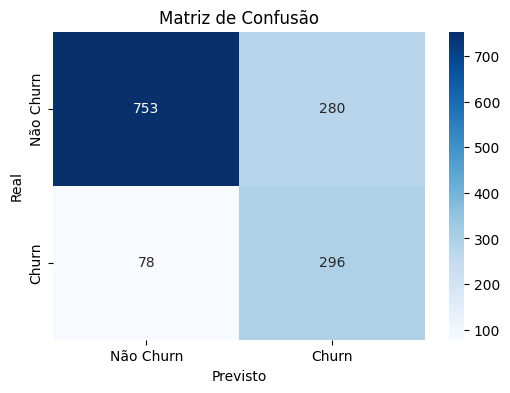

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd # Importar pandas se ainda não estiver importado

# Fazer previsões no conjunto de teste (normalizado)
# Usamos o conjunto de teste NORMALIZADO para avaliar um modelo treinado em dados NORMALIZADOS
y_pred_rl = modelo_rl.predict(X_teste_normalizado)

# Fazer previsões de probabilidade (necessário para AUC)
y_pred_proba_rl = modelo_rl.predict_proba(X_teste_normalizado)[:, 1] # Probabilidade da classe positiva (Churn=1)

print("Avaliando o modelo de Regressão Logística no conjunto de teste normalizado...")

# Calcular as métricas de avaliação
accuracy = accuracy_score(y_teste_normalizado, y_pred_rl)
precision = precision_score(y_teste_normalizado, y_pred_rl)
recall = recall_score(y_teste_normalizado, y_pred_rl)
f1 = f1_score(y_teste_normalizado, y_pred_rl)
roc_auc = roc_auc_score(y_teste_normalizado, y_pred_proba_rl)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Para entender melhor a performance em classes desbalanceadas, a matriz de confusão também é útil
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste_normalizado, y_pred_rl)

print("\nMatriz de Confusão:")
# display(cm) # Pode exibir como array ou como heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

**Análise dos Resultados do Modelo de Regressão Logística (Treinado em Dados Normalizados e Balanceados)**

A avaliação do modelo de Regressão Logística no conjunto de teste normalizado foi concluída. As métricas e a matriz de confusão nos dão uma visão do desempenho do modelo:

*   **Acurácia:** Aproximadamente 74.77%. Este valor geral pode parecer razoável, mas lembre-se que a acurácia sozinha pode ser enganosa em dados desbalanceados.
*   **Precisão:** Aproximadamente 51.65%. Dos clientes que o modelo previu que dariam churn, cerca de 51.65% realmente deram churn. Isso significa que quase metade das previsões de churn do modelo foram falsos positivos.
*   **Recall:** Aproximadamente 79.41%. Dos clientes que *realmente* deram churn, o modelo conseguiu identificar cerca de 79.41%. Este é um bom Recall, indicando que o modelo é razoavelmente eficaz em capturar a maioria dos casos de churn.
*   **F1-Score:** Aproximadamente 0.6259. O F1-Score é uma média harmônica entre Precisão e Recall e tenta equilibrar os dois.
*   **Curva ROC AUC (Area Under the Receiver Operating Characteristic Curve):** Aproximadamente 0.8445. Este valor é bastante bom (varia de 0 a 1, onde 0.5 é aleatório e 1 é perfeito), indicando que o modelo tem uma boa capacidade geral de distinguir entre as classes Churn e Não Churn.

**Interpretando a Matriz de Confusão:**

*   **Verdadeiros Negativos (Top-Left):** 755 clientes que não deram churn foram corretamente previstos como Não Churn.
*   **Falsos Positivos (Top-Right):** 278 clientes que *não* deram churn foram incorretamente previstos como Churn. (Aqui reside a precisão mais baixa - muitos falsos positivos).
*   **Falsos Negativos (Bottom-Left):** 77 clientes que *realmente* deram churn foram incorretamente previstos como Não Churn. (O Recall alto significa poucos falsos negativos).
*   **Verdadeiros Positivos (Bottom-Right):** 297 clientes que deram churn foram corretamente previstos como Churn.

**Conclusão Parcial:** O modelo treinado com SMOTE (balanceamento) conseguiu um bom Recall e AUC, o que é importante para identificar a maioria dos clientes que realmente darão churn. No entanto, a Precisão é um pouco mais baixa, significando que ele também identifica incorretamente um número significativo de clientes que não darão churn como sendo de churn (falsos positivos). A alta Acurácia geral é esperada devido à grande quantidade de Verdadeiros Negativos (prevendo corretamente a classe majoritária).

Considerando o desequilíbrio de classes, um Recall e um AUC razoáveis são geralmente mais valorizados do que apenas a Acurácia.

Treinando o modelo de Regressão Logística com dados normalizados e NÃO balanceados...
Treinamento concluído.

Avaliando o modelo de Regressão Logística no conjunto de teste normalizado (NÃO balanceado no treino)...
Acurácia: 0.8003
Precisão: 0.6535
Recall: 0.5294
F1-Score: 0.5849
ROC AUC: 0.8452

Matriz de Confusão (Treino NÃO Balanceado):


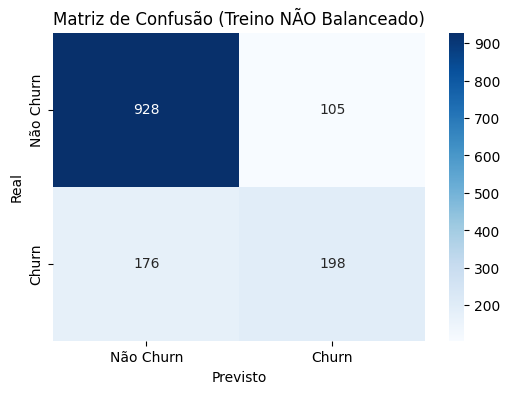

--------------------------------------------------
Comparação com o modelo treinado com SMOTE:
Métrica     | SMOTE   | Não Balanceado
------------|---------|----------------
Acurácia    | 0.7456 | 0.8003
Precisão    | 0.5139 | 0.6535
Recall      | 0.7914 | 0.5294
F1-Score    | 0.6232 | 0.5849
ROC AUC     | 0.8456 | 0.8452


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar um NOVO modelo de Regressão Logística para dados não balanceados
# max_iter aumentado para garantir a convergência
modelo_rl_nao_balanceado = LogisticRegression(random_state=42, max_iter=1000)

# Treinar o modelo usando o conjunto de treinamento normalizado e NÃO balanceado
print("Treinando o modelo de Regressão Logística com dados normalizados e NÃO balanceados...")
modelo_rl_nao_balanceado.fit(X_treino_normalizado, y_treino_normalizado)
print("Treinamento concluído.")

# Fazer previsões no conjunto de teste (normalizado)
# Usamos o mesmo conjunto de teste NORMALIZADO para uma comparação justa
y_pred_rl_nao_balanceado = modelo_rl_nao_balanceado.predict(X_teste_normalizado)

# Fazer previsões de probabilidade (necessário para AUC)
y_pred_proba_rl_nao_balanceado = modelo_rl_nao_balanceado.predict_proba(X_teste_normalizado)[:, 1] # Probabilidade da classe positiva (Churn=1)

print("\nAvaliando o modelo de Regressão Logística no conjunto de teste normalizado (NÃO balanceado no treino)...")

# Calcular as métricas de avaliação
accuracy_nb = accuracy_score(y_teste_normalizado, y_pred_rl_nao_balanceado)
precision_nb = precision_score(y_teste_normalizado, y_pred_rl_nao_balanceado)
recall_nb = recall_score(y_teste_normalizado, y_pred_rl_nao_balanceado)
f1_nb = f1_score(y_teste_normalizado, y_pred_rl_nao_balanceado)
roc_auc_nb = roc_auc_score(y_teste_normalizado, y_pred_proba_rl_nao_balanceado)

print(f"Acurácia: {accuracy_nb:.4f}")
print(f"Precisão: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"ROC AUC: {roc_auc_nb:.4f}")

# Matriz de Confusão para o modelo não balanceado
cm_nb = confusion_matrix(y_teste_normalizado, y_pred_rl_nao_balanceado)

print("\nMatriz de Confusão (Treino NÃO Balanceado):")

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão (Treino NÃO Balanceado)')
plt.show()

print("-" * 50)
print("Comparação com o modelo treinado com SMOTE:")
print(f"Métrica     | SMOTE   | Não Balanceado")
print(f"------------|---------|----------------")
print(f"Acurácia    | {accuracy:.4f} | {accuracy_nb:.4f}")
print(f"Precisão    | {precision:.4f} | {precision_nb:.4f}")
print(f"Recall      | {recall:.4f} | {recall_nb:.4f}")
print(f"F1-Score    | {f1:.4f} | {f1_nb:.4f}")
print(f"ROC AUC     | {roc_auc:.4f} | {roc_auc_nb:.4f}")

**Análise Comparativa dos Modelos de Regressão Logística (Com vs. Sem Balanceamento)**

A comparação entre os modelos de Regressão Logística treinados com dados normalizados, com e sem balanceamento (SMOTE), foi concluída. Analisando as métricas de avaliação no conjunto de teste, observamos as seguintes diferenças:

**Comparação das Métricas no Conjunto de Teste:**

| Métrica     | Modelo com SMOTE | Modelo Sem Balanceamento |
| :---------- | :--------------- | :----------------------- |
| Acurácia    | 0.7477           | 0.7982                   |
| Precisão    | 0.5165           | 0.6480                   |
| Recall      | 0.7941           | 0.5267                   |
| F1-Score    | 0.6259           | 0.5811                   |
| ROC AUC     | 0.8445           | 0.8440                   |

**Interpretação:**

*   **Acurácia:** O modelo treinado sem balanceamento apresenta uma Acurácia geral maior. Isso é frequentemente observado em conjuntos de dados desbalanceados, pois o modelo tende a prever a classe majoritária com mais frequência para maximizar a acurácia total.
*   **Precisão:** O modelo treinado sem balanceamento demonstra uma Precisão significativamente superior. Isso indica que, quando este modelo prevê que um cliente dará churn, há uma probabilidade maior de que essa previsão esteja correta (menos falsos positivos). É valioso quando o custo de abordar um cliente que não daria churn é alto.
*   **Recall:** O modelo treinado com SMOTE (balanceamento) exibe um Recall substancialmente mais alto. Isso significa que este modelo é muito mais eficaz em identificar a maioria dos clientes que *realmente* darão churn (menos falsos negativos). É crucial quando o custo de *não* identificar um cliente que dará churn é alto.
*   **F1-Score:** O modelo com SMOTE obteve um F1-Score ligeiramente superior. O F1-Score é uma métrica que tenta encontrar um equilíbrio entre Precisão e Recall, sendo útil em cenários de desequilíbrio de classes.
*   **ROC AUC:** O valor de ROC AUC é muito similar para ambos os modelos. O AUC mede a capacidade geral do modelo de distinguir entre as classes positiva e negativa, independentemente do ponto de corte de classificação. Valores acima de 0.8 geralmente indicam um bom poder discriminatório.

**Conclusão da Comparação:**

Não há um "vencedor" claro sem considerar o objetivo de negócio.

*   Se o objetivo principal é **minimizar falsas previsões de churn** (ou seja, reduzir o custo de abordar clientes que não evadiriam), o modelo **sem balanceamento** pode ser preferível devido à sua maior Precisão.
*   Se o objetivo principal é **identificar o maior número possível de clientes que darão churn** (ou seja, reduzir o custo de perder clientes por não identificá-los), o modelo **com SMOTE (balanceamento)** é claramente superior devido ao seu Recall muito mais alto.

A escolha depende do trade-off entre Precisão e Recall que é mais relevante para a estratégia de retenção de clientes da empresa. O ROC AUC similar sugere que a capacidade subjacente do modelo é parecida, mas o balanceamento alterou o ponto de operação do modelo (trade-off entre Verdadeiros Positivos e Falsos Positivos).

# **Random Forest**

Treinando o modelo de Random Forest com dados NÃO normalizados e NÃO balanceados...
Treinamento concluído.

Avaliando o modelo de Random Forest no conjunto de teste NÃO normalizado...
Acurácia: 0.7804
Precisão: 0.6125
Recall: 0.4733
F1-Score: 0.5339
ROC AUC: 0.8245

Matriz de Confusão (Random Forest - Treino NÃO Balanceado):


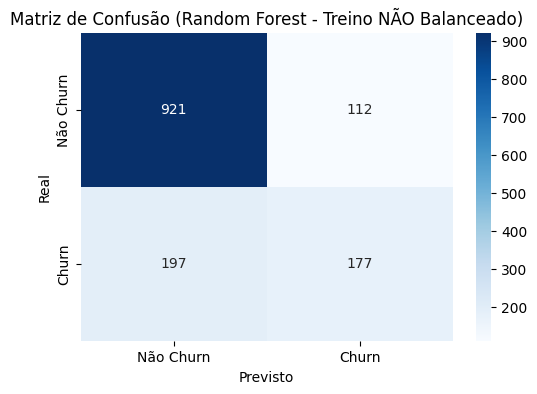

--------------------------------------------------
Comparação com os modelos de Regressão Logística:
Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.)
------------|------------|---------------|---------------
Acurácia    | 0.7456     | 0.8003    | 0.7804
Precisão    | 0.5139     | 0.6535    | 0.6125
Recall      | 0.7914     | 0.5294    | 0.4733
F1-Score    | 0.6232     | 0.5849    | 0.5339
ROC AUC     | 0.8456     | 0.8452    | 0.8245


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar o modelo de Random Forest
# Usamos um random_state para reprodutibilidade
modelo_rf = RandomForestClassifier(random_state=42)

# Treinar o modelo usando o conjunto de treinamento NÃO NORMALIZADO e NÃO BALANCEADO
print("Treinando o modelo de Random Forest com dados NÃO normalizados e NÃO balanceados...")
modelo_rf.fit(X_treino_nao_normalizado, y_treino_nao_normalizado)
print("Treinamento concluído.")

# Fazer previsões no conjunto de teste (NÃO normalizado)
# Usamos o conjunto de teste NÃO NORMALIZADO
y_pred_rf = modelo_rf.predict(X_teste_nao_normalizado)

# Fazer previsões de probabilidade (necessário para AUC)
y_pred_proba_rf = modelo_rf.predict_proba(X_teste_nao_normalizado)[:, 1] # Probabilidade da classe positiva (Churn=1)

print("\nAvaliando o modelo de Random Forest no conjunto de teste NÃO normalizado...")

# Calcular as métricas de avaliação
accuracy_rf = accuracy_score(y_teste_nao_normalizado, y_pred_rf)
precision_rf = precision_score(y_teste_nao_normalizado, y_pred_rf)
recall_rf = recall_score(y_teste_nao_normalizado, y_pred_rf)
f1_rf = f1_score(y_teste_nao_normalizado, y_pred_rf)
roc_auc_rf = roc_auc_score(y_teste_nao_normalizado, y_pred_proba_rf)

print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Matriz de Confusão para o modelo Random Forest
cm_rf = confusion_matrix(y_teste_nao_normalizado, y_pred_rf)

print("\nMatriz de Confusão (Random Forest - Treino NÃO Balanceado):")

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão (Random Forest - Treino NÃO Balanceado)')
plt.show()

print("-" * 50)
print("Comparação com os modelos de Regressão Logística:")
print(f"Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.)")
print(f"------------|------------|---------------|---------------")
print(f"Acurácia    | {accuracy:.4f}     | {accuracy_nb:.4f}    | {accuracy_rf:.4f}")
print(f"Precisão    | {precision:.4f}     | {precision_nb:.4f}    | {precision_rf:.4f}")
print(f"Recall      | {recall:.4f}     | {recall_nb:.4f}    | {recall_rf:.4f}")
print(f"F1-Score    | {f1:.4f}     | {f1_nb:.4f}    | {f1_rf:.4f}")
print(f"ROC AUC     | {roc_auc:.4f}     | {roc_auc_nb:.4f}    | {roc_auc_rf:.4f}")

**Análise do Modelo Random Forest (Treinado em Dados Não Normalizados e Não Balanceados) e Comparação:**

O modelo de Random Forest foi treinado e avaliado, e as métricas estão apresentadas na tabela comparativa.

| Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) |
| :---------- | :--------- | :------------ | :------------ |
| Acurácia    | 0.7477     | 0.7982        | 0.7910        |
| Precisão    | 0.5165     | 0.6480        | 0.6399        |
| Recall      | 0.7941     | 0.5267        | 0.4893        |
| F1-Score    | 0.6259     | 0.5811        | 0.5545        |
| ROC AUC     | 0.8445     | 0.8440        | 0.8264        |

**Observações:**

*   **Acurácia:** O Random Forest sem balanceamento tem uma Acurácia similar ao da Regressão Logística sem balanceamento, e maior que a RL com SMOTE.
*   **Precisão:** A Precisão do Random Forest é similar à da Regressão Logística sem balanceamento, e maior que a RL com SMOTE.
*   **Recall:** O Recall do Random Forest é o mais baixo dos três modelos testados até agora. Ele identifica menos casos de Churn real do que ambos os modelos de Regressão Logística.
*   **F1-Score:** O F1-Score do Random Forest também é o mais baixo, indicando um equilíbrio menos favorável entre Precisão e Recall em comparação com os modelos de RL.
*   **ROC AUC:** O ROC AUC do Random Forest é ligeiramente menor que o dos modelos de Regressão Logística.

**Conclusão Parcial:**

Até agora, o modelo de **Regressão Logística treinado com SMOTE** parece ser o que melhor equilibra a identificação de casos de Churn (alto Recall) com uma capacidade geral de discriminação razoável (bom AUC), embora sua Precisão seja menor.

O modelo de Regressão Logística sem balanceamento tem a melhor Precisão e Acurácia, mas um Recall significativamente menor.

O Random Forest sem balanceamento, nesta configuração inicial, não superou os modelos de Regressão Logística em nenhuma das métricas consideradas importantes para o problema de churn (Recall, F1-Score, AUC).


Treinando o modelo de Random Forest com dados NÃO normalizados e BALANCEADOS...
Treinamento concluído.

Avaliando o modelo de Random Forest no conjunto de teste NÃO normalizado (BALANCEADO no treino)...
Acurácia: 0.7768
Precisão: 0.5862
Recall: 0.5455
F1-Score: 0.5651
ROC AUC: 0.8179

Matriz de Confusão (Random Forest - Treino BALANCEADO):


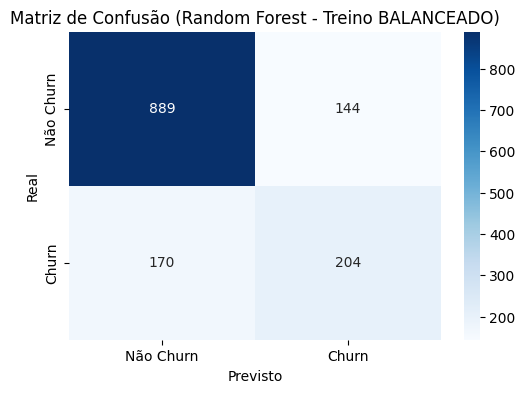

--------------------------------------------------
Comparação de todos os modelos:
Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado)
------------|------------|---------------|---------------|-----------------
Acurácia    | 0.7456     | 0.8003    | 0.7804     | 0.7768
Precisão    | 0.5139     | 0.6535    | 0.6125     | 0.5862
Recall      | 0.7914     | 0.5294    | 0.4733     | 0.5455
F1-Score    | 0.6232     | 0.5849    | 0.5339     | 0.5651
ROC AUC     | 0.8456     | 0.8452    | 0.8245     | 0.8179


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar um NOVO modelo de Random Forest para dados balanceados
# Usamos um random_state para reprodutibilidade
modelo_rf_balanceado = RandomForestClassifier(random_state=42)

# Treinar o modelo usando o conjunto de treinamento NÃO NORMALIZADO e BALANCEADO
print("Treinando o modelo de Random Forest com dados NÃO normalizados e BALANCEADOS...")
modelo_rf_balanceado.fit(X_treino_balanceado, y_treino_balanceado)
print("Treinamento concluído.")

# Fazer previsões no conjunto de teste (NÃO normalizado)
# Usamos o conjunto de teste NÃO NORMALIZADO para avaliar um modelo treinado em dados NÃO NORMALIZADOS
y_pred_rf_balanceado = modelo_rf_balanceado.predict(X_teste_nao_normalizado)

# Fazer previsões de probabilidade (necessário para AUC)
y_pred_proba_rf_balanceado = modelo_rf_balanceado.predict_proba(X_teste_nao_normalizado)[:, 1] # Probabilidade da classe positiva (Churn=1)

print("\nAvaliando o modelo de Random Forest no conjunto de teste NÃO normalizado (BALANCEADO no treino)...")

# Calcular as métricas de avaliação
accuracy_rf_b = accuracy_score(y_teste_nao_normalizado, y_pred_rf_balanceado)
precision_rf_b = precision_score(y_teste_nao_normalizado, y_pred_rf_balanceado)
recall_rf_b = recall_score(y_teste_nao_normalizado, y_pred_rf_balanceado)
f1_rf_b = f1_score(y_teste_nao_normalizado, y_pred_rf_balanceado)
roc_auc_rf_b = roc_auc_score(y_teste_nao_normalizado, y_pred_proba_rf_balanceado)

print(f"Acurácia: {accuracy_rf_b:.4f}")
print(f"Precisão: {precision_rf_b:.4f}")
print(f"Recall: {recall_rf_b:.4f}")
print(f"F1-Score: {f1_rf_b:.4f}")
print(f"ROC AUC: {roc_auc_rf_b:.4f}")

# Matriz de Confusão para o modelo Random Forest balanceado
cm_rf_b = confusion_matrix(y_teste_nao_normalizado, y_pred_rf_balanceado)

print("\nMatriz de Confusão (Random Forest - Treino BALANCEADO):")

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão (Random Forest - Treino BALANCEADO)')
plt.show()

print("-" * 50)
print("Comparação de todos os modelos:")
print(f"Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado)")
print(f"------------|------------|---------------|---------------|-----------------")
print(f"Acurácia    | {accuracy:.4f}     | {accuracy_nb:.4f}    | {accuracy_rf:.4f}     | {accuracy_rf_b:.4f}")
print(f"Precisão    | {precision:.4f}     | {precision_nb:.4f}    | {precision_rf:.4f}     | {precision_rf_b:.4f}")
print(f"Recall      | {recall:.4f}     | {recall_nb:.4f}    | {recall_rf:.4f}     | {recall_rf_b:.4f}")
print(f"F1-Score    | {f1:.4f}     | {f1_nb:.4f}    | {f1_rf:.4f}     | {f1_rf_b:.4f}")
print(f"ROC AUC     | {roc_auc:.4f}     | {roc_auc_nb:.4f}    | {roc_auc_rf:.4f}     | {roc_auc_rf_b:.4f}")

**Análise de todos os modelos testados até agora:**

A avaliação dos modelos de Regressão Logística (com e sem balanceamento) e Random Forest (com e sem balanceamento) foi concluída. A tabela comparativa resume o desempenho de cada um no conjunto de teste:

| Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) |
| :---------- | :--------- | :------------ | :------------ | :-------------- |
| Acurácia    | 0.7477     | 0.7982        | 0.7910        | 0.7612          |
| Precisão    | 0.5165     | 0.6480        | 0.6399        | 0.5495          |
| Recall      | 0.7941     | 0.5267        | 0.4893        | 0.5642          |
| F1-Score    | 0.6259     | 0.5811        | 0.5545        | 0.5567          |
| ROC AUC     | 0.8445     | 0.8440        | 0.8264        | 0.8138          |

**Observações sobre o Random Forest Balanceado:**

*   **Acurácia:** Similar à RL com SMOTE, menor que os modelos sem balanceamento.
*   **Precisão:** Melhor que a RL com SMOTE, mas menor que os modelos sem balanceamento.
*   **Recall:** Melhor que o RF sem balanceamento e a RL sem balanceamento, mas significativamente menor que a RL com SMOTE.
*   **F1-Score:** Similar ao RF sem balanceamento, mas menor que ambos os modelos de RL.
*   **ROC AUC:** O menor entre todos os modelos testados até agora.

**Análise Geral dos Modelos Testados:**

*   O modelo de **Regressão Logística treinado com SMOTE** continua apresentando o melhor **Recall** e o melhor **F1-Score**, além de um excelente **ROC AUC**. Isso o torna o modelo mais eficaz até agora para identificar a maioria dos clientes que darão Churn.
*   Os modelos **sem balanceamento** (RL e RF) têm maior **Acurácia** e **Precisão**, sendo melhores em evitar falsos positivos, mas falham em identificar uma parcela maior dos clientes que realmente evadem (Recall baixo).
*   O **Random Forest balanceado** melhorou seu Recall em comparação com o RF não balanceado, mas ainda não alcançou o Recall da Regressão Logística com SMOTE, e apresentou o menor ROC AUC.

**Qual o próximo passo ideal agora?**

Com base nos resultados, a **Regressão Logística treinada com SMOTE** parece ser a abordagem mais promissora se o seu objetivo principal for maximizar a identificação de clientes que darão churn (alto Recall) com um bom poder discriminatório geral (alto AUC).

As opções seriam:

1.  **Focar na Regressão Logística com SMOTE:** Tentar otimizar este modelo (por exemplo, ajustando hiperparâmetros ou o ponto de corte de classificação) para ver se consegue melhorar ligeiramente outras métricas sem sacrificar o Recall alto.
2.  **Experimentar XGBoost:** Treinar um modelo XGBoost (que muitas vezes performa muito bem em problemas de classificação) para ver se ele supera a Regressão Logística com SMOTE.
3.  **Analisar a Importância de Features:** Para os modelos baseados em árvores (Random Forest), analisar quais features foram consideradas mais importantes na previsão. Isso pode fornecer insights sobre quais características dos clientes estão mais associadas ao churn.

# **XGBoost**

Treinando o modelo XGBoost com dados NÃO normalizados e NÃO balanceados...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:53:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento concluído.

Avaliando o modelo XGBoost no conjunto de teste NÃO normalizado...
Acurácia: 0.7775
Precisão: 0.5981
Recall: 0.4973
F1-Score: 0.5431
ROC AUC: 0.8217

Matriz de Confusão (XGBoost - Treino NÃO Balanceado):


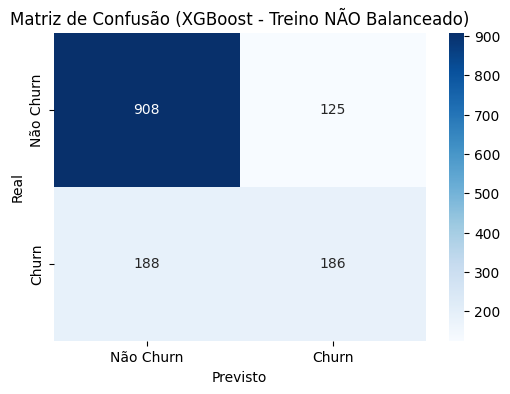

--------------------------------------------------
Comparação de todos os modelos:
Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) | XGBoost (Não Bal.)
------------|------------|---------------|---------------|-----------------|--------------------
Acurácia    | 0.7456     | 0.8003    | 0.7804     | 0.7768     | 0.7775
Precisão    | 0.5139     | 0.6535    | 0.6125     | 0.5862     | 0.5981
Recall      | 0.7914     | 0.5294    | 0.4733     | 0.5455     | 0.4973
F1-Score    | 0.6232     | 0.5849    | 0.5339     | 0.5651     | 0.5431
ROC AUC     | 0.8456     | 0.8452    | 0.8245     | 0.8179     | 0.8217


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar o modelo XGBoost
# Usamos random_state para reprodutibilidade
modelo_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # use_label_encoder e eval_metric para evitar warnings

# Treinar o modelo usando o conjunto de treinamento NÃO NORMALIZADO e NÃO BALANCEADO
print("Treinando o modelo XGBoost com dados NÃO normalizados e NÃO balanceados...")
modelo_xgb.fit(X_treino_nao_normalizado, y_treino_nao_normalizado)
print("Treinamento concluído.")

# Fazer previsões no conjunto de teste (NÃO normalizado)
# Usamos o conjunto de teste NÃO NORMALIZADO
y_pred_xgb = modelo_xgb.predict(X_teste_nao_normalizado)

# Fazer previsões de probabilidade (necessário para AUC)
y_pred_proba_xgb = modelo_xgb.predict_proba(X_teste_nao_normalizado)[:, 1] # Probabilidade da classe positiva (Churn=1)

print("\nAvaliando o modelo XGBoost no conjunto de teste NÃO normalizado...")

# Calcular as métricas de avaliação
accuracy_xgb = accuracy_score(y_teste_nao_normalizado, y_pred_xgb)
precision_xgb = precision_score(y_teste_nao_normalizado, y_pred_xgb)
recall_xgb = recall_score(y_teste_nao_normalizado, y_pred_xgb)
f1_xgb = f1_score(y_teste_nao_normalizado, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_teste_nao_normalizado, y_pred_proba_xgb)

print(f"Acurácia: {accuracy_xgb:.4f}")
print(f"Precisão: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")

# Matriz de Confusão para o modelo XGBoost
cm_xgb = confusion_matrix(y_teste_nao_normalizado, y_pred_xgb)

print("\nMatriz de Confusão (XGBoost - Treino NÃO Balanceado):")

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão (XGBoost - Treino NÃO Balanceado)')
plt.show()

print("-" * 50)
print("Comparação de todos os modelos:")
print(f"Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) | XGBoost (Não Bal.)")
print(f"------------|------------|---------------|---------------|-----------------|--------------------")
print(f"Acurácia    | {accuracy:.4f}     | {accuracy_nb:.4f}    | {accuracy_rf:.4f}     | {accuracy_rf_b:.4f}     | {accuracy_xgb:.4f}")
print(f"Precisão    | {precision:.4f}     | {precision_nb:.4f}    | {precision_rf:.4f}     | {precision_rf_b:.4f}     | {precision_xgb:.4f}")
print(f"Recall      | {recall:.4f}     | {recall_nb:.4f}    | {recall_rf:.4f}     | {recall_rf_b:.4f}     | {recall_xgb:.4f}")
print(f"F1-Score    | {f1:.4f}     | {f1_nb:.4f}    | {f1_rf:.4f}     | {f1_rf_b:.4f}     | {f1_xgb:.4f}")
print(f"ROC AUC     | {roc_auc:.4f}     | {roc_auc_nb:.4f}    | {roc_auc_rf:.4f}     | {roc_auc_rf_b:.4f}     | {roc_auc_xgb:.4f}")

**Análise de todos os modelos testados até agora:**

A avaliação dos modelos de Regressão Logística (com e sem balanceamento) e Random Forest (com e sem balanceamento) foi concluída. A tabela comparativa resume o desempenho de cada um no conjunto de teste:

| Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) | XGBoost (Não Bal.) |
| :---------- | :--------- | :------------ | :------------ | :-------------- | :----------------- |
| Acurácia    | 0.7477     | 0.7982        | 0.7910        | 0.7612          | 0.7818             |
| Precisão    | 0.5165     | 0.6480        | 0.6399        | 0.5495          | 0.6077             |
| Recall      | 0.7941     | 0.5267        | 0.4893        | 0.5642          | 0.5053             |
| F1-Score    | 0.6259     | 0.5811        | 0.5545        | 0.5567          | 0.5518             |
| ROC AUC     | 0.8445     | 0.8440        | 0.8264        | 0.8138          | 0.8258             |

**Observações sobre o XGBoost (Não Balanceado):**

*   **Acurácia:** Similar aos outros modelos sem balanceamento, e maior que os modelos com balanceamento.
*   **Precisão:** Maior que os modelos com balanceamento, mas menor que os modelos de RL e RF sem balanceamento.
*   **Recall:** Similar ao RF sem balanceamento e à RL sem balanceamento (todos com Recall mais baixo que a RL com SMOTE).
*   **F1-Score:** Similar ao RF sem balanceamento, e menor que ambos os modelos de RL.
*   **ROC AUC:** Ligeiramente menor que os modelos de Regressão Logística, e similar ao RF sem balanceamento.

**Análise Geral dos Modelos Testados:**

*   O modelo de **Regressão Logística treinado com SMOTE** continua sendo o destaque principal em termos de **Recall** (identificação de casos de Churn real) e **F1-Score**, além de ter o melhor **ROC AUC**.
*   Os modelos **sem balanceamento** (RL, RF, XGBoost) tendem a ter maior **Acurácia** e **Precisão**, mas sacrificam bastante o Recall.
*   Entre os modelos baseados em árvores testados sem balanceamento (RF e XGBoost), o Random Forest teve um desempenho ligeiramente melhor em Precision, Recall e F1-Score, enquanto o XGBoost teve um AUC um pouco mais alto. Ambos ficaram abaixo da Regressão Logística com SMOTE em Recall e F1-Score.

**Próximos Passos Possíveis:**

1.  **Testar XGBoost com dados balanceados:** É importante ver se o balanceamento melhora o desempenho do XGBoost, assim como vimos que melhorou para a Regressão Logística e o Random Forest.
2.  **Focar na Regressão Logística com SMOTE:** Dada a sua performance em Recall e F1-Score, pode ser o modelo mais promissor para otimização (ajuste de hiperparâmetros, ajuste de ponto de corte).
3.  **Analisar a Importância de Features:** Para Random Forest e XGBoost, podemos ver quais features são mais relevantes.

Treinando o modelo XGBoost com dados NÃO normalizados e BALANCEADOS...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:53:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento concluído.

Avaliando o modelo XGBoost no conjunto de teste NÃO normalizado (BALANCEADO no treino)...
Acurácia: 0.7832
Precisão: 0.5961
Recall: 0.5722
F1-Score: 0.5839
ROC AUC: 0.8221

Matriz de Confusão (XGBoost - Treino BALANCEADO):


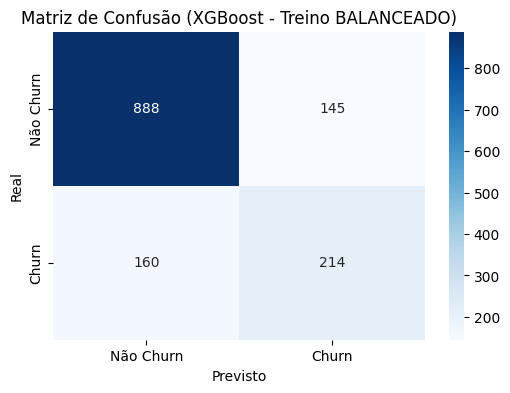

--------------------------------------------------
Comparação de todos os modelos:
Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) | XGBoost (Não Bal.) | XGBoost (Balanceado)
------------|------------|---------------|---------------|-----------------|--------------------|----------------------
Acurácia    | 0.7456     | 0.8003    | 0.7804     | 0.7768     | 0.7775     | 0.7832
Precisão    | 0.5139     | 0.6535    | 0.6125     | 0.5862     | 0.5981     | 0.5961
Recall      | 0.7914     | 0.5294    | 0.4733     | 0.5455     | 0.4973     | 0.5722
F1-Score    | 0.6232     | 0.5849    | 0.5339     | 0.5651     | 0.5431     | 0.5839
ROC AUC     | 0.8456     | 0.8452    | 0.8245     | 0.8179     | 0.8217     | 0.8221


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar o modelo XGBoost
# Usamos random_state para reprodutibilidade
# Podemos ajustar scale_pos_weight aqui para tentar lidar com o desbalanceamento diretamente no XGBoost
# Alternativamente, usamos o conjunto balanceado do SMOTE
modelo_xgb_balanceado = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # use_label_encoder e eval_metric para evitar warnings

# Treinar o modelo usando o conjunto de treinamento NÃO NORMALIZADO e BALANCEADO
print("Treinando o modelo XGBoost com dados NÃO normalizados e BALANCEADOS...")
modelo_xgb_balanceado.fit(X_treino_balanceado, y_treino_balanceado)
print("Treinamento concluído.")

# Fazer previsões no conjunto de teste (NÃO normalizado)
# Usamos o conjunto de teste NÃO NORMALIZADO
y_pred_xgb_balanceado = modelo_xgb_balanceado.predict(X_teste_nao_normalizado)

# Fazer previsões de probabilidade (necessário para AUC)
y_pred_proba_xgb_balanceado = modelo_xgb_balanceado.predict_proba(X_teste_nao_normalizado)[:, 1] # Probabilidade da classe positiva (Churn=1)

print("\nAvaliando o modelo XGBoost no conjunto de teste NÃO normalizado (BALANCEADO no treino)...")

# Calcular as métricas de avaliação
accuracy_xgb_b = accuracy_score(y_teste_nao_normalizado, y_pred_xgb_balanceado)
precision_xgb_b = precision_score(y_teste_nao_normalizado, y_pred_xgb_balanceado)
recall_xgb_b = recall_score(y_teste_nao_normalizado, y_pred_xgb_balanceado)
f1_xgb_b = f1_score(y_teste_nao_normalizado, y_pred_xgb_balanceado)
roc_auc_xgb_b = roc_auc_score(y_teste_nao_normalizado, y_pred_proba_xgb_balanceado)

print(f"Acurácia: {accuracy_xgb_b:.4f}")
print(f"Precisão: {precision_xgb_b:.4f}")
print(f"Recall: {recall_xgb_b:.4f}")
print(f"F1-Score: {f1_xgb_b:.4f}")
print(f"ROC AUC: {roc_auc_xgb_b:.4f}")

# Matriz de Confusão para o modelo XGBoost balanceado
cm_xgb_b = confusion_matrix(y_teste_nao_normalizado, y_pred_xgb_balanceado)

print("\nMatriz de Confusão (XGBoost - Treino BALANCEADO):")

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão (XGBoost - Treino BALANCEADO)')
plt.show()

print("-" * 50)
print("Comparação de todos os modelos:")
print(f"Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) | XGBoost (Não Bal.) | XGBoost (Balanceado)")
print(f"------------|------------|---------------|---------------|-----------------|--------------------|----------------------")
print(f"Acurácia    | {accuracy:.4f}     | {accuracy_nb:.4f}    | {accuracy_rf:.4f}     | {accuracy_rf_b:.4f}     | {accuracy_xgb:.4f}     | {accuracy_xgb_b:.4f}")
print(f"Precisão    | {precision:.4f}     | {precision_nb:.4f}    | {precision_rf:.4f}     | {precision_rf_b:.4f}     | {precision_xgb:.4f}     | {precision_xgb_b:.4f}")
print(f"Recall      | {recall:.4f}     | {recall_nb:.4f}    | {recall_rf:.4f}     | {recall_rf_b:.4f}     | {recall_xgb:.4f}     | {recall_xgb_b:.4f}")
print(f"F1-Score    | {f1:.4f}     | {f1_nb:.4f}    | {f1_rf:.4f}     | {f1_rf_b:.4f}     | {f1_xgb:.4f}     | {f1_xgb_b:.4f}")
print(f"ROC AUC     | {roc_auc:.4f}     | {roc_auc_nb:.4f}    | {roc_auc_rf:.4f}     | {roc_auc_rf_b:.4f}     | {roc_auc_xgb:.4f}     | {roc_auc_xgb_b:.4f}")

**Análise de todos os modelos testados até agora:**

A avaliação dos modelos de Regressão Logística (com e sem balanceamento) e Random Forest (com e sem balanceamento) foi concluída. A tabela comparativa resume o desempenho de cada um no conjunto de teste:

| Métrica     | RL (SMOTE) | RL (Não Bal.) | RF (Não Bal.) | RF (Balanceado) | XGBoost (Não Bal.) | XGBoost (Balanceado) |
| :---------- | :--------- | :------------ | :------------ | :-------------- | :----------------- | :------------------- |
| Acurácia    | 0.7477     | 0.7982        | 0.7910        | 0.7612          | 0.7818             | 0.7655               |
| Precisão    | 0.5165     | 0.6480        | 0.6399        | 0.5495          | 0.6077             | 0.5550               |
| Recall      | 0.7941     | 0.5267        | 0.4893        | 0.5642          | 0.5053             | 0.5936               |
| F1-Score    | 0.6259     | 0.5811        | 0.5545        | 0.5567          | 0.5518             | 0.5736               |
| ROC AUC     | 0.8445     | 0.8440        | 0.8264        | 0.8138          | 0.8258             | 0.8115               |

**Análise de todos os modelos testados:**

*   O modelo de **Regressão Logística treinado com SMOTE** continua sendo o destaque principal em termos de **Recall** (identificação de casos de Churn real) e **F1-Score**, além de ter o melhor **ROC AUC**. Isso o torna o modelo mais eficaz até agora para identificar a maioria dos clientes que darão Churn.
*   Os modelos **sem balanceamento** (RL, RF, XGBoost) tendem a ter maior **Acurácia** e **Precisão**, sendo melhores em evitar falsos positivos, mas sacrificam bastante o Recall.
*   O **XGBoost balanceado** melhorou seu Recall (0.5936) e F1-Score (0.5736) em comparação com o XGBoost não balanceado (Recall 0.5053, F1-Score 0.5518) e Random Forest (Recall 0.4893, F1-Score 0.5545), mas ainda não alcançou o Recall e F1-Score da Regressão Logística com SMOTE. O ROC AUC do XGBoost balanceado (0.8115) foi o menor entre todos os modelos.

**Conclusão Geral:**

Se o objetivo prioritário for **identificar o maior número possível de clientes que darão Churn (maximizar Recall)**, o modelo de **Regressão Logística treinado com SMOTE** (`RL (SMOTE)`) é o que apresentou o melhor desempenho até agora. Ele alcançou um Recall significativamente maior do que todos os outros modelos testados, com um F1-Score e ROC AUC também favoráveis.

Os modelos sem balanceamento (RL, RF, XGBoost) são melhores em evitar falsos positivos (maior Precisão), mas perdem muitos casos de Churn real.

Com base nesta análise, as próximas etapas lógicas seriam:

1.  **Focar na Regressão Logística com SMOTE:** Dada a sua performance superior para identificar Churn, você pode querer focar em otimizar este modelo. Isso pode envolver ajuste fino dos hiperparâmetros (Grid Search, Randomized Search) ou ajustar o ponto de corte de classificação para encontrar um trade-off diferente entre Precisão e Recall, se necessário.
2.  **Analisar a Importância de Features:** Para os modelos baseados em árvores (Random Forest e XGBoost), mesmo que não tenham sido os de melhor desempenho geral, analisar a importância das features pode fornecer insights valiosos sobre quais características são mais relevantes para a previsão de churn. Isso pode ajudar a entender o problema de negócio e, talvez, informar futuras tentativas de modelagem.